Benson Luo, 552 HW5, USC ID:9649157234

In [1]:
import pandas as pd

Part(1)

In [48]:
col_name = ["temperature", "nausea", "Lumbar_pain", "Urine_pushing", "Micturition_pains", "Burning", "Inflammation","Nephritis"]
with open("diagnosis.data", encoding="utf-16") as f:
    lines = [line.strip() for line in f if line.strip()]

data = []
for line in lines:
    parts = line.split("\t")
    temp = float(parts[0].replace(",","."))
    rest = parts[1:]
    data.append([temp] + rest)

df = pd.DataFrame(data, columns=col_name)
df


,temperature,nausea,Lumbar_pain,Urine_pushing,Micturition_pains,Burning,Inflammation,Nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


(b)

In [49]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [50]:
string_col = ["nausea", "Lumbar_pain", "Urine_pushing", "Micturition_pains", "Burning", "Inflammation","Nephritis"]
df[string_col] = df[string_col].replace({"yes":1, "no":0})
# Normalize the 0 (normal) and 1 (abnormal)
for col in string_col:
    if col in ["nausea", "Lumbar_pain", "Nephritis"]:
        df[col] = 1-df[col]
df

C:\Users\16381\AppData\Local\Temp\ipykernel_234468\4204883054.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[string_col] = df[string_col].replace({"yes":1, "no":0})


,temperature,nausea,Lumbar_pain,Urine_pushing,Micturition_pains,Burning,Inflammation,Nephritis
0,35.5,1,0,0,0,0,0,1
1,35.9,1,1,1,1,1,1,1
2,35.9,1,0,0,0,0,0,1
3,36.0,1,1,1,1,1,1,1
4,36.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
115,41.4,1,0,1,0,1,0,0
116,41.5,1,1,0,0,0,0,1
117,41.5,0,0,0,1,0,0,0
118,41.5,1,0,1,0,1,0,0


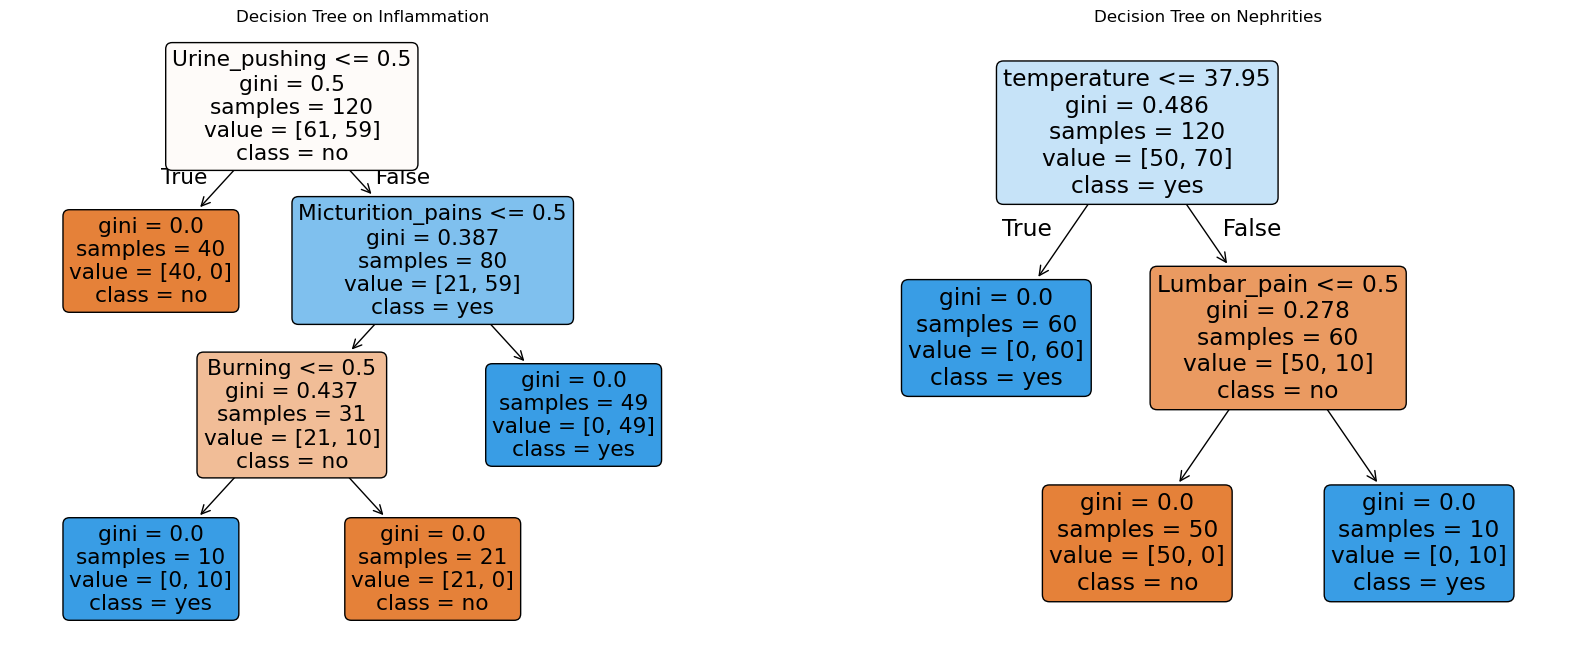

In [95]:
X = df.drop(columns=["Inflammation",  "Nephritis"])
y1 = df["Inflammation"]
y2 = df["Nephritis"]

tree1 = DecisionTreeClassifier()
tree1.fit(X,y1)

tree2 = DecisionTreeClassifier()
tree2.fit(X,y2)

fig,axes = plt.subplots(1,2,figsize=(20,8))

plot_tree(
    tree1,
    feature_names = X.columns,
    class_names = ["no","yes"],
    filled = True,
    rounded = True,
    ax = axes[0])
axes[0].set_title("Decision Tree on Inflammation")
plot_tree(
    tree2,
    feature_names = X.columns,
    class_names = ["no","yes"],
    filled = True,
    rounded = True,
    ax = axes[1]) 
axes[1].set_title("Decision Tree on Nephrities")
plt.show()


(c)

In [238]:
from sklearn.tree import _tree

def tree_to_pseudo(tree, feature_names):
    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] if i != -2 else "leaf" for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(node, depth=0):
        indent = "  " * depth
        if left[node] != -1:
            print(f"{indent}if ({features[node]} <= {threshold[node]:.4f}) {{")
            recurse(left[node], depth+1)
            print(f"{indent}}} else {{")
            recurse(right[node], depth+1)
            print(f"{indent}}}")
        else:
            val = value[node][0][0]  
            print(f"{indent}return {val:.4f}")

    recurse(0)
tree_to_pseudo(tree1, X_train.columns)
print("\n")
tree_to_pseudo(tree2, X_train.columns)

if (racePctWhite <= 0.5000) {
  return 1.0000
} else {
  if (racePctAsian <= 0.5000) {
    if (racePctHisp <= 0.5000) {
      return 0.0000
    } else {
      return 1.0000
    }
  } else {
    return 0.0000
  }
}


if (population <= 37.9500) {
  return 0.0000
} else {
  if (racepctblack <= 0.5000) {
    return 1.0000
  } else {
    return 0.0000
  }
}


(d)

In [104]:
path1 = tree1.cost_complexity_pruning_path(X,y1)
ccp_alphas1 = path1.ccp_alphas

clfs1 = []

for alpha1 in ccp_alphas1:
    puring_tree1 = DecisionTreeClassifier(ccp_alpha = alpha1)
    puring_tree1.fit(X,y1)
    clfs1.append(puring_tree1)

train_scores1 = [clf.score(X, y1) for clf in clfs1]

best_index1 = train_scores1.index(max(train_scores1))
best_tree1 = clfs1[best_index1]


path2 = tree2.cost_complexity_pruning_path(X,y2)
ccp_alphas2 = path2.ccp_alphas
clfs2 = []

for alpha2 in ccp_alphas2:
    puring_tree2 = DecisionTreeClassifier(ccp_alpha = alpha2)
    puring_tree2.fit(X,y2)
    clfs2.append(puring_tree2)

train_scores2 = [clf.score(X, y2) for clf in clfs2]

best_index2 = train_scores2.index(max(train_scores2))
best_tree2 = clfs2[best_index2]


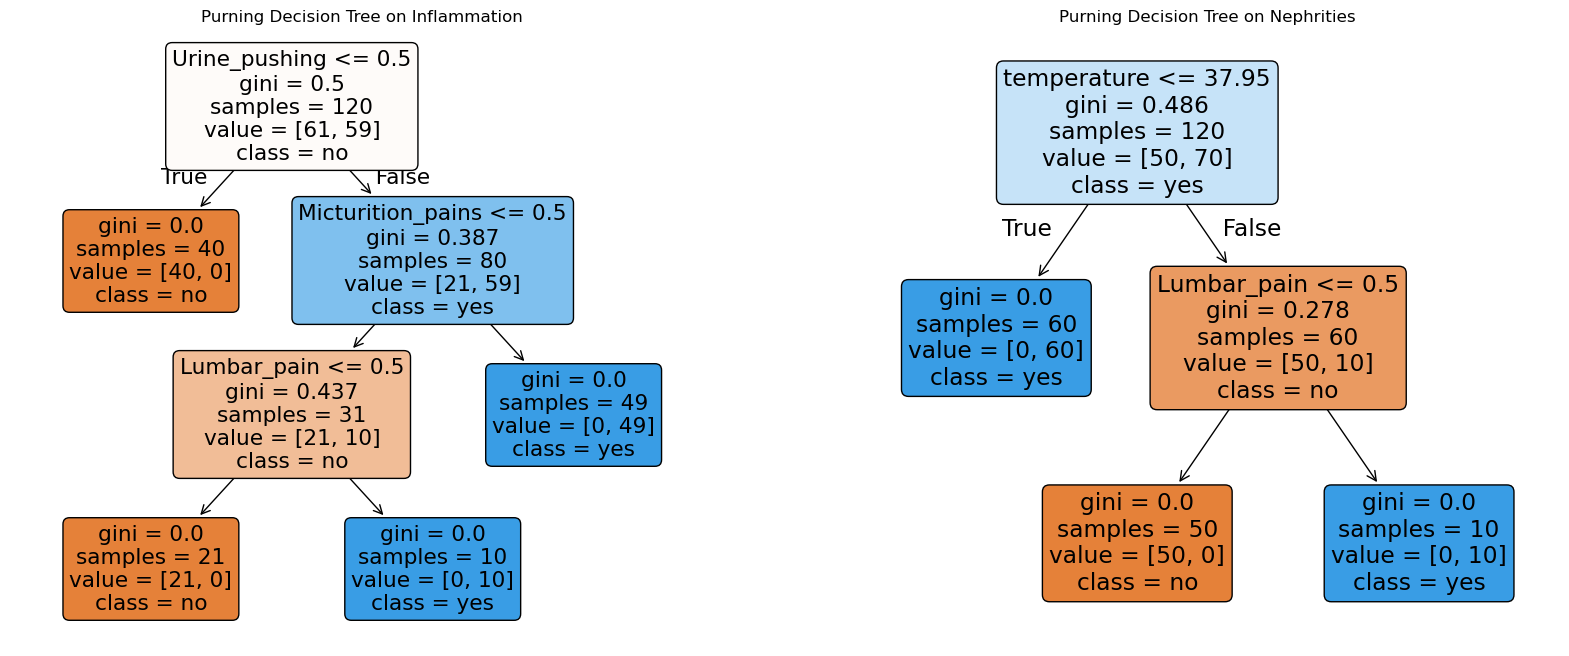

In [103]:
fig,axes = plt.subplots(1,2,figsize=(20,8))

plot_tree(
    best_tree1,
    feature_names = X.columns,
    class_names = ["no","yes"],
    filled = True,
    rounded = True,
    ax = axes[0])
axes[0].set_title("Purning Decision Tree on Inflammation")
plot_tree(
    best_tree2,
    feature_names = X.columns,
    class_names = ["no","yes"],
    filled = True,
    rounded = True,
    ax = axes[1]) 
axes[1].set_title("Purning Decision Tree on Nephrities")
plt.show()


In [240]:
tree_to_pseudo(best_tree1, X_train.columns)
tree_to_pseudo(best_tree2, X_train.columns)

if (racePctWhite <= 0.5000) {
  return 1.0000
} else {
  if (racePctAsian <= 0.5000) {
    if (racepctblack <= 0.5000) {
      return 1.0000
    } else {
      return 0.0000
    }
  } else {
    return 0.0000
  }
}
if (population <= 37.9500) {
  return 0.0000
} else {
  if (racepctblack <= 0.5000) {
    return 1.0000
  } else {
    return 0.0000
  }
}


Part(2)

Source:

re and re.match: https://docs.python.org/3/library/re.html; https://www.geeksforgeeks.org/python/re-match-in-python/

sklearn.impute - Impute data method: https://scikit-learn.org/stable/modules/impute.html

RidgeCV vs. Ridge: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

LassoCV vs. Lasso: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

XGBoost: https://www.datacamp.com/tutorial/xgboost-in-python

(a)

In [188]:
import re
with open("communities.names") as f:
    lines = f.readlines()

col_names = []
for line in lines:
    match = re.match(r'@attribute\s+(\S+)', line, re.IGNORECASE)
    if match:
        col_names.append(match.group(1))



In [189]:
comm_df = pd.read_csv("communities.data", names=col_names, na_values="?")
comm_df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


(b)

In [190]:
non_predictive = ["state", "county", "community", "communityname", "fold"]
comm_df = comm_df.drop(columns=non_predictive)
comm_df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [191]:
train_data = comm_df[:1495]
test_data = comm_df[1495:]

X_train = train_data.drop(columns=["ViolentCrimesPerPop"])
y_train = train_data["ViolentCrimesPerPop"]

X_test = test_data.drop(columns=["ViolentCrimesPerPop"])
y_test = test_data["ViolentCrimesPerPop"]

In [192]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

(c)

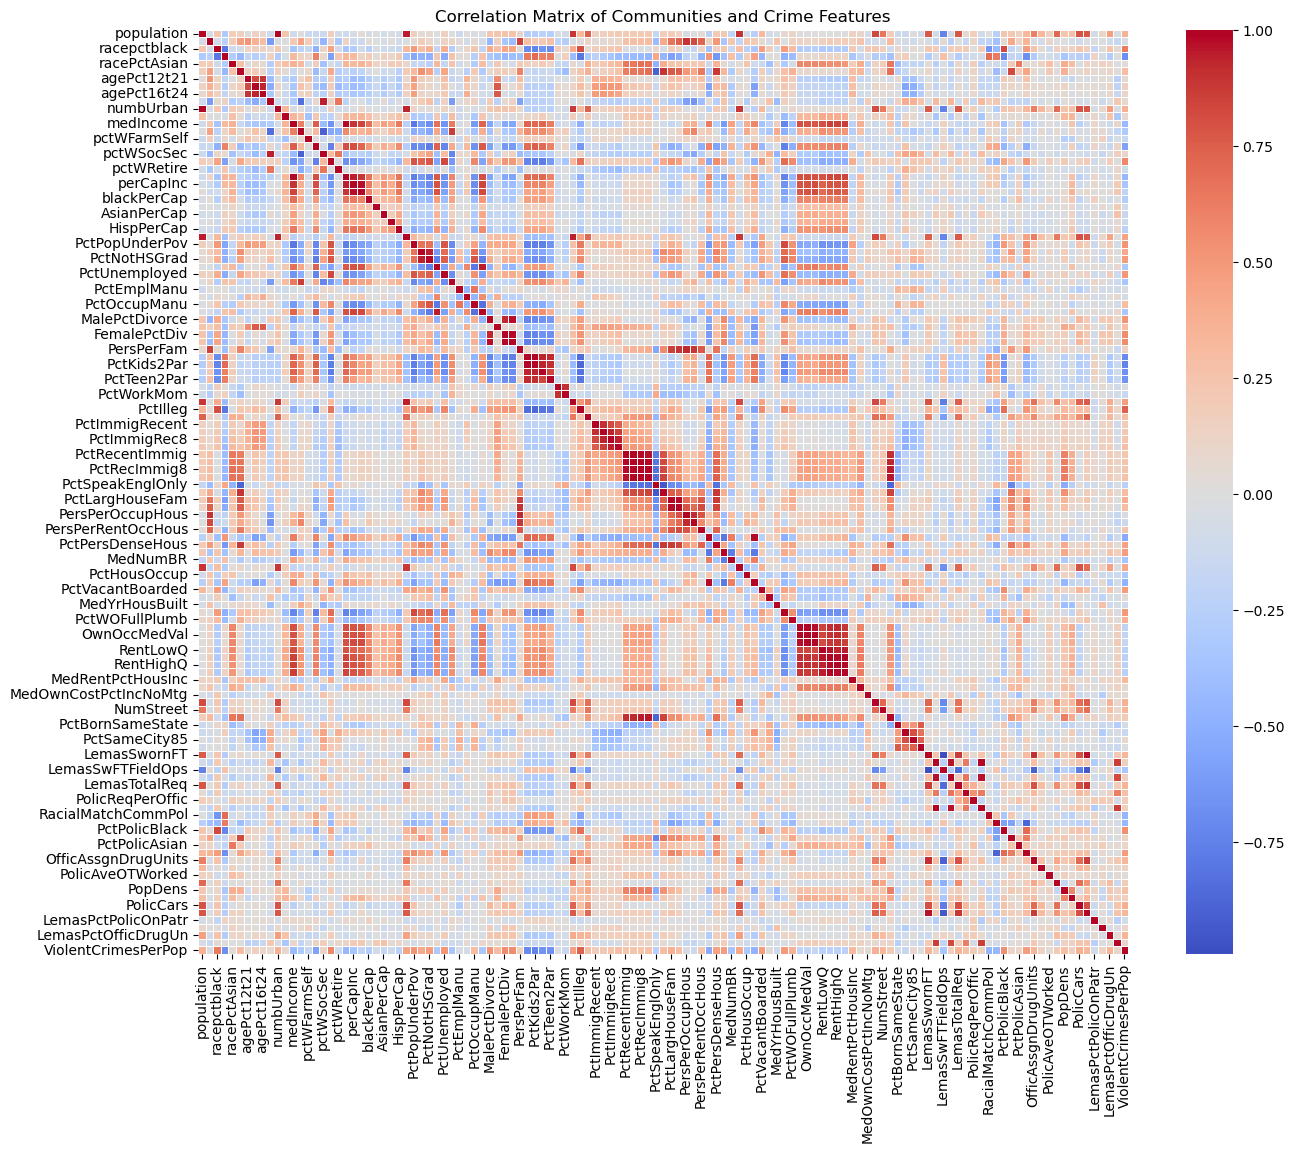

In [193]:
import seaborn as sns
corr_ma = comm_df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr_ma,
            cmap='coolwarm',
            center=0, 
            annot=False, 
            fmt=".2f",
            linewidths=0.5)

plt.title("Correlation Matrix of Communities and Crime Features")
plt.show()

(d)

In [194]:
means = comm_df.mean()
std = comm_df.std()

cv = std/means
cv

population             2.203503
householdsize          0.353298
racepctblack           1.410920
racePctWhite           0.323782
racePctAsian           1.359162
                         ...   
LemasPctPolicOnPatr    0.306251
LemasGangUnitDeploy    0.921372
LemasPctOfficDrugUn    2.555266
PolicBudgPerPop        0.844368
ViolentCrimesPerPop    0.979015
Length: 123, dtype: float64

(e)

In [195]:
top_11_cv = cv.sort_values(ascending=False).head(11)
top_11_cv

NumStreet              4.407702
NumInShelters          3.485481
NumIlleg               2.994196
NumImmig               2.900497
LemasPctOfficDrugUn    2.555266
NumUnderPov            2.304970
population             2.203503
numbUrban              2.001744
LemasSwornFT           1.984599
PctPolicAsian          1.979371
HousVacant             1.958780
dtype: float64

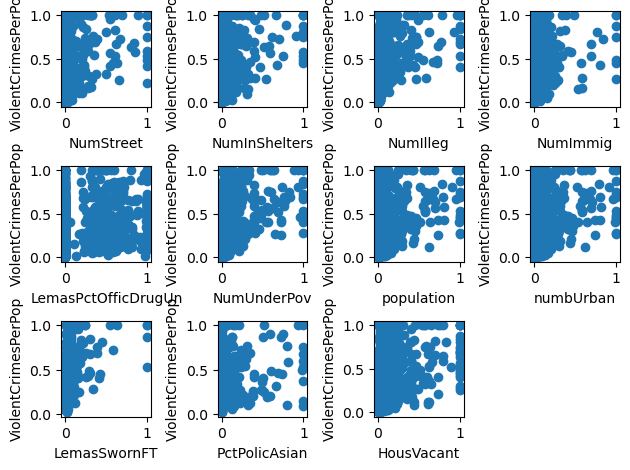

In [196]:
plt.figure()
dependent = "ViolentCrimesPerPop"
x = comm_df.drop(columns=[dependent])
y = comm_df[dependent]


for i, feature in enumerate(top_11_cv.index):
    plt.subplot(3,4,i+1)
    plt.scatter(x[feature], y)
    plt.xlabel(feature)
    plt.ylabel("ViolentCrimesPerPop")
plt.tight_layout()
    

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(1, 0, 'NumStreet'),
  Text(2, 0, 'NumInShelters'),
  Text(3, 0, 'NumIlleg'),
  Text(4, 0, 'NumImmig'),
  Text(5, 0, 'LemasPctOfficDrugUn'),
  Text(6, 0, 'NumUnderPov'),
  Text(7, 0, 'population'),
  Text(8, 0, 'numbUrban'),
  Text(9, 0, 'LemasSwornFT'),
  Text(10, 0, 'PctPolicAsian'),
  Text(11, 0, 'HousVacant')])

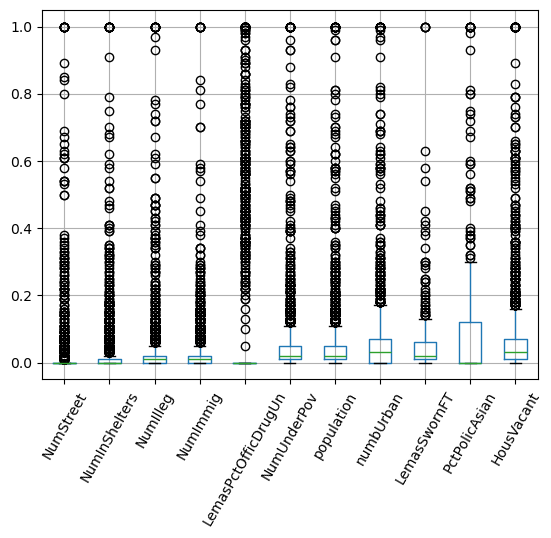

In [197]:
plt.figure()
x[top_11_cv.index].boxplot()
plt.xticks(rotation=60)

No, we can not only draw the scatter plot, becasue in this problem, we cannot ensure if there is a relationship between independent and dependent variable, I think we need more statistical evidence to support the conclusion.

(f)

In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [202]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("MSE:", mse)


MSE: 1.0230036588510774e+16


(g)

In [203]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-3, 2, 10)
ridge = RidgeCV(alphas=alphas, store_cv_results=True)
ridge.fit(X_train, y_train)

print("Best alpha:", ridge.alpha_)

y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE after Ridge:", mse)


Best alpha: 2.1544346900318843
MSE after Ridge: 0.017525046262752954


(h)

In [212]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso.fit(X_train,y_train)

y_pred = lasso.predict(X_test)
mse_original = mean_squared_error(y_test, y_pred)
original_selected = X_train.columns[np.abs(lasso.coef_)>1e-6]

print("LASSO Orignial features MSE:", mse_original)
print("Selected Features without standardlized:", original_selected)

LASSO Orignial features MSE: 0.017545410513550564
Selected Features without standardlized: Index(['racepctblack', 'racePctWhite', 'agePct12t29', 'pctUrban',
       'pctWPubAsst', 'AsianPerCap', 'MalePctDivorce', 'PctKids2Par',
       'PctYoungKids2Par', 'PctWorkMom', 'PctIlleg', 'PctRecImmig10',
       'PctPersDenseHous', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded',
       'MedRentPctHousInc', 'MedOwnCostPctIncNoMtg', 'NumStreet',
       'PctForeignBorn', 'PctSameCity85', 'LemasGangUnitDeploy',
       'LemasPctOfficDrugUn'],
      dtype='object')


In [211]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

lasso_std = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_std.fit(X_train_scaled, y_train)

y_pred = lasso_std.predict(X_test_scaled)
mse_std = mean_squared_error(y_test, y_pred)
std_selected = X_train.columns[np.abs(lasso_std.coef_)>1e-6]

print("LASSO Standard MSE:", mse_std)
print("Selected Features with standardlized:", std_selected)

LASSO Standard MSE: 0.017835124471323637
Selected Features with standardlized: Index(['racepctblack', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage',
       'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire',
       'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap',
       'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade',
       'PctEmploy', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom',
       'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec5', 'PctRecImmig10',
       'PctNotSpeakEnglWell', 'PctPersOwnOccup', 'PctPersDenseHous',
       'PctHousLess3BR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded',
       'PctVacMore6Mos', 'MedYrHousBuilt', 'PctWOFullPlumb', 'RentLowQ',
       'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
       'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn',
       'PctSameCity85', 'LemasSwFTFieldPerPop', 

From the result, I find that Lasso with standardlized will choose more features, and has a little larger MSE

(i)

In [221]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

n_components = np.arange(1, X_train.shape[1] + 1, 5) 
cv = []

for m in n_components:
    pca = PCA(n_components=m)
    pca_X = pca.fit_transform(X_train)
    model = LinearRegression()
    mse = -np.mean(cross_val_score(model, pca_X, y_train,
                                   scoring="neg_mean_squared_error", cv=5))
    cv.append(mse)

best_m_index = np.argmin(cv)
best_m = n_components[best_m_index]

pca_final = PCA(n_components=best_m)
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.fit_transform(X_test)

model_final = LinearRegression()
model_final.fit(X_train_pca, y_train)

y_pred = model_final.predict(X_test_pca)

mse = mean_squared_error(y_test, y_pred)

print("MSE:", mse)

MSE: 0.033378126308704986


(j)

In [223]:
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   - -------------------------------------- 2.1/72.0 MB 19.5 MB/s eta 0:00:04
   -- ------------------------------------- 3.9/72.0 MB 12.4 MB/s eta 0:00:06
   ---- ----------------------------------- 8.1/72.0 MB 15.7 MB/s eta 0:00:05
   ------- -------------------------------- 13.9/72.0 MB 18.5 MB/s eta 0:00:04
   ---------- ----------------------------- 18.4/72.0 MB 19.3 MB/s eta 0:00:03
   ------------- -------------------------- 23.9/72.0 MB 20.7 MB/s eta 0:00:03
   ---------------- ----------------------- 29.6/72.0 MB 21.8 MB/s eta 0:00:02
   ------------------- -------------------- 35.4/72.0 MB 22.7 MB/s eta 0:00:02
   ----------------------- ---------------- 42.5/72.0 MB 23.9 MB/s eta 0:00:02
   -------------------------- ------------- 47.2/72.0 MB 24.0 MB/s eta 0:00:02
   ------------------------------ --------- 54.3/72.0 MB 24.9 MB/s eta 0:00:01
   --------------------------------- ------ 60.3/72.0 MB 25.1 MB

In [228]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=4,
    learning_rate=0.1,
    n_estimators=200,
    reg_lambda=0,                 
    random_state=42)

param_grid = {'reg_alpha': [0, 0.01, 0.1, 1, 10, 100]}  
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['reg_alpha']

final_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=4,
    learning_rate=0.1,
    n_estimators=200,
    reg_alpha=best_alpha,
    reg_lambda=0,
    random_state=42
)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("MSE:", mse)

MSE: 0.016706997941666347
